# Data Cleaning and Validation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots
import numpy as np
import calmap

# Read data from CSV files
# Recommendation: We will need to include 

DA_Data = pd.read_csv("C:/Users/KANGHEA/OneDrive - Hilti/Study/WQD7003/Assignment/GroupAssignment/DA_Data.csv")

DA_Data.head()

,date,date_block_num,shop_id,item_id,item_id.1,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,0,59,22154,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-01-03,0,25,2552,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,2013-01-05,0,25,2552,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,2013-01-06,0,25,2554,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,2013-01-15,0,25,2555,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""


From first 5 rows, we can already infer that there is data quality issue: 
1) There is negative value showing in the itm_cnt_day. itm_cnt_day - number of products sold.

# General Check

# Build more feature

In [2]:
# change date frame date to date format for further reporting
DA_Data['date'] = pd.to_datetime(DA_Data['date'])
DA_Data['date_month'] = DA_Data['date'].dt.month
DA_Data['date_year'] = DA_Data['date'].dt.year

# Check Null value in data frame

In [3]:
# Check whether there is null value or not
DA_Data.isna().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_id.1             0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
date_month            0
date_year             0
dtype: int64

# Check whether we have redundant data for cal day and item id

In [18]:
redundantData = DA_Data 
redundantData['count'] = ''
#redundantData = redundantData.groupby(['date', 'item_id', 'shop_id'])[['count']].agg(['count']).reset_index()
redundantData = redundantData.groupby(['date','item_id','shop_id'])[['count']].agg('count').reset_index()

redundantData.sort_values( by=['count'],inplace=True, ascending=False )

redundantData = redundantData.loc[redundantData['count'] > 1]

redundantData.count()

#to do: compare more row and find out the difference
#redundantData.head()

date       28
item_id    28
shop_id    28
count      28
dtype: int64

It seems that there are data with 2 rows. Maybe double count? Let's check

In [5]:
#furtherchecking
redundantData = DA_Data.loc[(DA_Data['item_id'] == 12133) & (DA_Data['shop_id'] == 31) & (DA_Data['date'] == '2014-03-09')]
redundantData

,date,date_block_num,shop_id,item_id,item_id.1,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,date_month,date_year,count
1507628,2014-03-09,14,31,12133,12133,399.0,1.0,Игровой набор с микророботами Вориорз для поед...,62,"Подарки - Гаджеты, роботы, спорт","Москва ТЦ ""Семеновский""",3,2014,
1507629,2014-03-09,14,31,12133,12133,599.0,1.0,Игровой набор с микророботами Вориорз для поед...,62,"Подарки - Гаджеты, роботы, спорт","Москва ТЦ ""Семеновский""",3,2014,


# Check the item_cnt_day

In [6]:
# Quick checking the summary of item_cnt_day
DA_Data['item_cnt_day'].describe()

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

# Visualize distribution of the field item_cnt_day

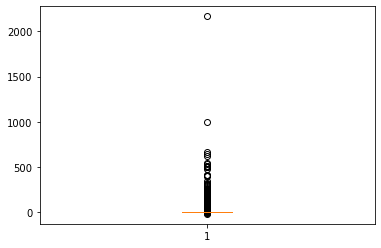

In [7]:
plt.boxplot(DA_Data['item_cnt_day'])
plt.show()

# Find the number of record based on the percentile: (2 and 98)

In [20]:
# Get the 98th and 2nd percentile as the limits of our outliers
upper_limit = np.percentile(DA_Data.item_cnt_day.values, 98) 
lower_limit = np.percentile(DA_Data.item_cnt_day.values, 2) 
# Filter the outliers from the dataframe
print('Number of Total Rows in dataframe : ' , DA_Data.shape[0])

upper_limit = DA_Data.loc[DA_Data['item_cnt_day']>upper_limit]

print('Number of Upper Limit Rows in dataframe : ' , upper_limit.shape[0])

lower_limit = DA_Data.loc[DA_Data['item_cnt_day']<lower_limit]

print('Number of Upper Limit Rows in dataframe : ' , lower_limit.shape[0])

# Do a bellplot 

Number of Total Rows in dataframe :  2935849
Number of Upper Limit Rows in dataframe :  57570
Number of Upper Limit Rows in dataframe :  7356


# Check the item_price

In [9]:
# Check the summary of the item_price 
DA_Data['item_price'].describe()

count    2.935849e+06
mean     8.908532e+02
std      1.729800e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

# Visualize distribution of the field item_cnt_day

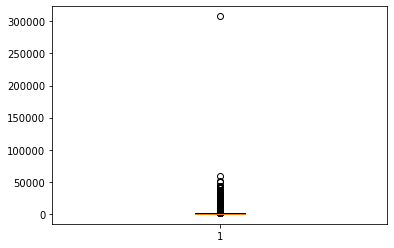

In [10]:
plt.boxplot(DA_Data['item_price'])

plt.show()

# Find the number of record based on the percentile: (2 and 98)

In [11]:
# Get the 98th and 2nd percentile as the limits of our outliers

upper_limit = np.percentile(DA_Data.item_price.values, 98) 
lower_limit = np.percentile(DA_Data.item_price.values, 2) 
# Filter the outliers from the dataframe
print('Number of Total Rows in dataframe : ' , DA_Data.shape[0])

upper_limit = DA_Data.loc[DA_Data['item_price']>upper_limit]


print('Number of Upper Limit Rows in dataframe : ' , upper_limit.shape[0])

lower_limit = DA_Data.loc[DA_Data['item_price']<lower_limit]

print('Number of Lower Limit Rows in dataframe : ' , lower_limit.shape[0])

Number of Total Rows in dataframe :  2935849
Number of Upper Limit Rows in dataframe :  58341
Number of Lower Limit Rows in dataframe :  57266


# Validate whether date_block_num is correctly assigned. 

In [12]:
# Check the CalBlockNum whether all block num is calculated correctly or not. 
testDatBNum = DA_Data

testDatBNum['date'] = pd.to_datetime(DA_Data['date'])

testDatBNum['firstDate'] = pd.to_datetime("2013-01-01")

testDatBNum

testDatBNum['CalBlockNum'] = 12 * (testDatBNum.date.dt.year - testDatBNum.firstDate.dt.year) + (testDatBNum.date.dt.month - testDatBNum.firstDate.dt.month )

print("Number of differece between date_blok_num and CalBlockNum : ",testDatBNum.query('date_block_num != CalBlockNum').shape[0])


Number of differece between date_blok_num and CalBlockNum :  0


# Checking Shop ID Validity/Accuracy

In [13]:
# Checking Shop ID availability

# Check any empty or NA value
noEmptyID = DA_Data.loc[DA_Data['shop_id'] == ''].shape[0]

print("Number of empty shop id: ", noEmptyID)

DA_Data.isna().sum()

checkShopID = pd.DataFrame(DA_Data, columns = ['shop_id'])

checkShopID = checkShopID.drop_duplicates()

checkShopID.sort_values(by=['shop_id'])

Number of empty shop id:  0


C:\Users\KANGHEA\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,shop_id
37589,0
41348,1
31951,2
32890,3
30072,4
164026,5
31260,6
34769,7
52625,8
1012860,9


# Total Sales General Trend

In [15]:
# Find aggregate sales by day
DA_Data['total_sales'] =  DA_Data['item_price'] * DA_Data['item_cnt_day']

# Split the data into year for fast performance
aggrSalesDay2013 = DA_Data.loc[DA_Data['date_year'] == 2013]
aggrSalesDay2014 = DA_Data.loc[DA_Data['date_year'] == 2014]
aggrSalesDay2015 = DA_Data.loc[DA_Data['date_year'] == 2015]

aggrSalesDay2013 = aggrSalesDay2013.groupby(['date_month','date_year'])[['total_sales']].agg('sum').reset_index()
aggrSalesDay2014 = aggrSalesDay2014.groupby(['date_month','date_year'])[['total_sales']].agg('sum').reset_index()
aggrSalesDay2015 = aggrSalesDay2015.groupby(['date_month','date_year'])[['total_sales']].agg('sum').reset_index()

aggrSalesDay = pd.concat([aggrSalesDay2013,aggrSalesDay2014,aggrSalesDay2015])

#aggrSalesDay
#try resample in ming's code. 
#create itm_count_day


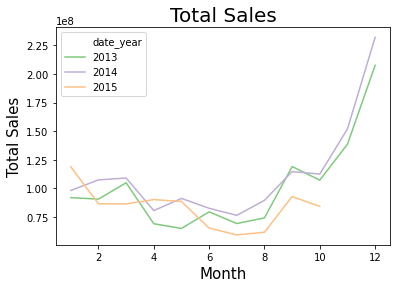

In [16]:
sns.lineplot(x='date_month', y = 'total_sales', data = aggrSalesDay,
           hue='date_year' , palette = 'Accent')
plt.title("Total Sales", fontsize = 20)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Total Sales", fontsize = 15)
plt.show()

Buld a heat map to check the activity by year, month, and week 

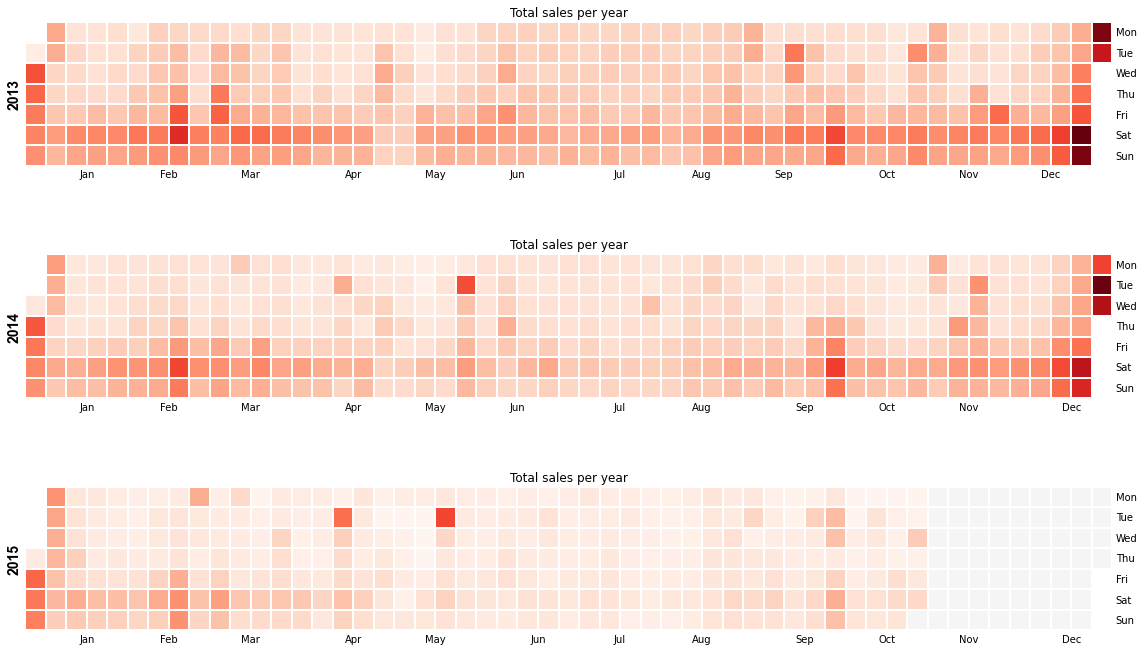

In [17]:
calHeatMap = DA_Data[["date", "item_cnt_day"]]

calHeatMap.set_index("date", inplace = True)

calHeatMap = calHeatMap.resample("D")["item_cnt_day"].sum()

calmap.calendarplot(calHeatMap, # pass the series
                    fig_kws = {'figsize': (16,10)}, 
                    yearlabel_kws = {'color':'black', 'fontsize':14}, 
                    subplot_kws = {'title':'Total sales per year'}
                   );